<a href="https://colab.research.google.com/github/1772hojaz/alu-ml_tech1-assignment/blob/main/LSTM_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sentiment Analysis - Group Assignment**
##Group 1 Members:



*   Humphrey Jones Gabarinocheka Nyahoja

*   Samuel Dushime


*   Audry Ashleen Chivanga


*   Jules Gatete








# **Aim**

The aim of this notebook is to develop and evaluate an LSTM

# **Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **Data Loading and Preprocesing of the  Dataset**

---



In [ ]:
#Loading the dataset
df = pd.read_csv("/IMDB Dataset.csv")
def simple_preprocess(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)  # removing HTML tags
    return text

df['clean_review'] = df['review'].apply(simple_preprocess)

# Convert sentiment to binary (positive = 1, negative = 0)
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# **Tokenization & Padding**

In [ ]:
# Tokenize the text
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['clean_review'])

X = tokenizer.texts_to_sequences(df['clean_review'])
X = pad_sequences(X, maxlen=max_len)

y = df['label'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


*It* looks like we have an even distribution between positive and negative sentiments , data is balanced

# **Building the LSTM Model**

In [ ]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# **Training the model**

In [ ]:
# Add early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 213s 835ms/step - accuracy: 0.6687 - loss: 0.5580 - val_accuracy: 0.8804 - val_loss: 0.2915
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 263s 839ms/step - accuracy: 0.9046 - loss: 0.2582 - val_accuracy: 0.8689 - val_loss: 0.3132
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 258s 824ms/step - accuracy: 0.9303 - loss: 0.1954 - val_accuracy: 0.8600 - val_loss: 0.3315


313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step


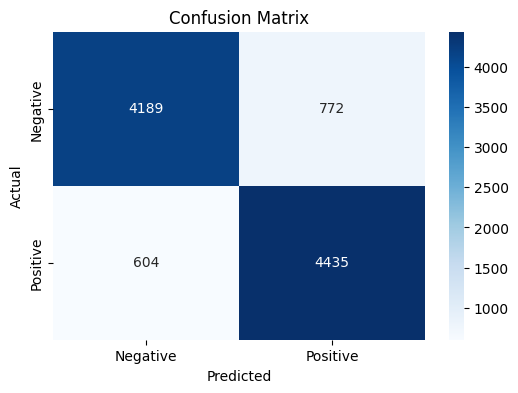

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4961
           1       0.85      0.88      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict labels
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


The model achieved an accuracy of 86%, meaning it correctly predicted the sentiment of 8,600 out of 10,000 reviews.

